# Numeric Features
## Preprocessing
### Scaling
- Tree-based models don't depend on scaling
- Non-tree based models hugely depend on them
- **Min-max scaling:** 
```python
sklearn.preprocessing.MinMaxScaler 
```
> $X = (X - X.min()) \mathbin{/} (X.max() - X.min())$
    
- **Std scaliing:**
```python
sklearn.preprocessing.StandardScaler
```
> $X = (X - X.mean()) \mathbin{/} X.std()$
    
### Outliers
- Remove outliers by clipping values between lower and upper bound (range of percentile)
- Used in financial data
```python
upperbound, lowerbound = np.percentile(x, [1, 99])
y = np.clip(x, upperbound, lowerbound)
```

### Rank Transformation
- Basis between properly sorted values should be equal
- Better than min-max scaling in handling outliers because it moves the outliers closer to other objects
```python
scipy.stats.rankdata
```

### Squashing Transforms
- Helps non tree-based models
```python
np.log(1 + x)         # log transform
np.sqrt(x + 2/3)      # raising to the power < 1
```

## Feature Generation
### Prior Knowledge based
- **House price prediction**
    - Given:
        - Squared area
        - Price
    - New Feature:
        - Price / squared area

- **Forest cover type prediction**
    - Given:
        - Horizontal distance to water source
        - Vertical distance to water source
    - New Feature:
        - Direct distance to water source
- Adding multiplications, divisions and other feature interactions are powerful even for tree-based models
- Creating a new feature containing the fractional part of the prices can help the model learn about people's perceptions regarding the difference in prices (or find spamming bots)

# Categorical and Ordinal Features
- **Ordinal features:** Sorted in increasing order of complexity 
    - Ticket class
    - Driver's license
    - Level of education
- Label encoding - helps with tree-based models
- Alphabetical sorting based encoding
    - [S, C, Q] -> [2, 1, 3]
    ```python
    sklearn.preprocessing.LabelEncoder
    ```
- Order of appearance based encoding
    - [S, C, Q] -> [1, 2, 3]
    ```python
    pandas.factorize
    ```
- Frequency encoding
    - maps categories to their frequencies
    - helps with tree-based models
    - [S, C, Q] -> [0.5, 0.3, 0.2]
```python
encoding = titanic.groupby('Embarked').size()
encoding = encoding/len(titanic)
titanic['enc'] = titanic.Embarked.map(encoding)
```
- One-hot encoding
    - helps with linear models, KNN, Neural nets
    ```python
    pandas.get_dummies
    sklearn.preprocessing.OneHotEncoder
    ```
    - If the number of non-zero elements is far less than half of all the values, then we can use sparse encoding. This can be exploited by tree-based models.
- Feature interaction
    - Can help non tree-based models
    
# Datetime and Coordinates
## Date and time
- Periodicity
    - Day number in week, month, season, year, second, minute, hour
- Time since
    - Row-independent moment: a particular time instant
    - Row-dependent important moment: Number of days left until next holidays, time passed since last holiday
- Difference between dates

## Coordinates
- Distance to the nearest shop or other special areas from train/test data or addit
- Centers of clusters
- Aggregated stats in a block: population density, income density

# Handling Missing Values
## Missing data
- Hidden NaNs
    - Plot histograms for features to find if nans have been replaced with a number
    - -999, -1, etc: neural nets may have a hard time but helpful for trees
    - Mean, median: this can be helpful for neural nets but creates issues for trees
        - A possible solution would be creating a separate row that indicates whether there's a missing value or not; but a downside of this approach is that it doubles the number features in the dataset
    - reconstruct value: doing interpolation in time series data

## Feature Generation with missing values
- Ignore the rows with nans when calculating mean/median of each category if we want to create a separate feature for category wise mean/median
- In general, avoid filling nans before feature generation
- XGBoost, CatBoost can handle missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
delays_df = pd.read_pickle('../data/flight_delays.pkl')

In [3]:
delays_df.head().T

,0,1,2,3,4
YEAR,2018,2018,2018,2018,2018
QUARTER,1,1,1,1,1
MONTH,1,1,1,1,1
DAY_OF_MONTH,1,1,2,2,3
DAY_OF_WEEK,1,1,2,2,3
FL_DATE,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00
CARRIER,9E,9E,9E,9E,9E
FL_NUM,3331,3940,3409,3940,3353
ROUTE,42,42,42,42,42
ORIGIN,ABY,ABY,ABY,ABY,ABY


In [32]:
delays_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,10915495.0,2.018334e+03,4.717609e-01,2018.0,2018.00,2018.0,2019.00,2019.0
QUARTER,10915495.0,2.193378e+00,1.060224e+00,1.0,1.00,2.0,3.00,4.0
MONTH,10915495.0,5.586137e+00,3.267714e+00,1.0,3.00,5.0,8.00,12.0
DAY_OF_MONTH,10915495.0,1.573286e+01,8.751599e+00,1.0,8.00,16.0,23.00,31.0
DAY_OF_WEEK,10915495.0,3.939845e+00,1.990693e+00,1.0,2.00,4.0,6.00,7.0
FL_NUM,10915495.0,2.579366e+03,1.841801e+03,1.0,1013.00,2126.0,3998.00,7933.0
ROUTE,10915495.0,3.169768e+03,1.887000e+03,1.0,1545.00,3206.0,4696.00,6684.0
CRS_DEP_TIME,10915495.0,1.329820e+03,4.912521e+02,1.0,915.00,1321.0,1735.00,2359.0
DEP_TIME,10915495.0,1.131842e+03,1.583533e+03,-9999.0,900.00,1317.0,1740.00,2400.0
DEP_DELAY,10915495.0,-1.730240e+02,1.343950e+03,-9999.0,-6.00,-2.0,7.00,2710.0


## Number of missing values

In [33]:
def find_num_missing_vals(s):
    return np.sum(s == -9999)

In [36]:
find_num_missing_vals(delays_df['DEP_TIME'])

195282

## Departure Delays

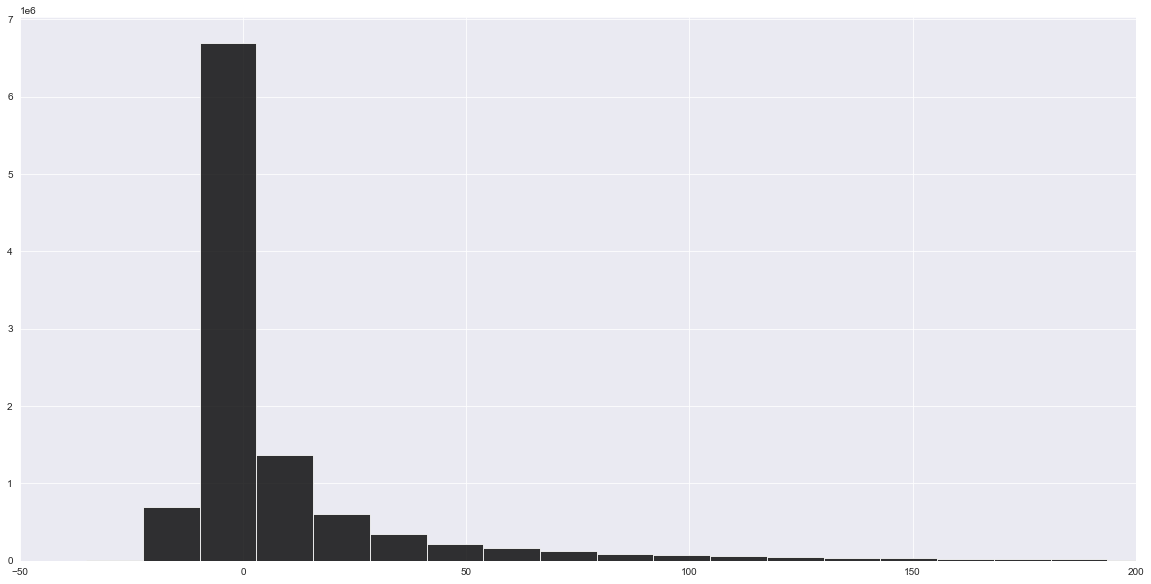

In [30]:
plt.figure(figsize=(20,10))
plt.hist(delays_df['DEP_DELAY'], bins=1000, color='k', alpha=0.8)
plt.xlim([-50, 200])
plt.show()

## Arrival Delays

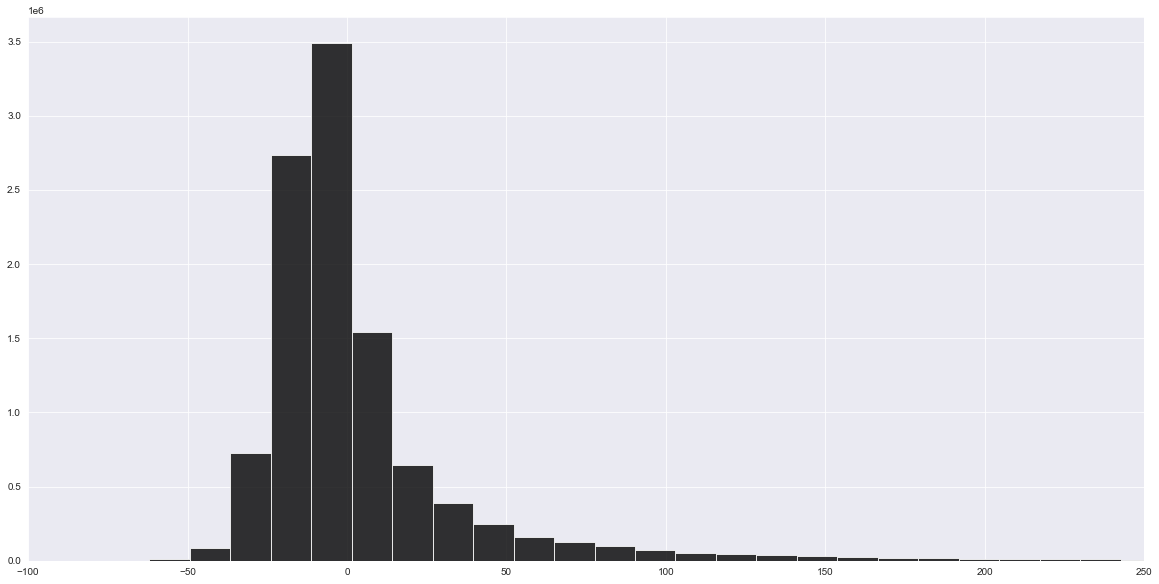

In [31]:
plt.figure(figsize=(20,10))
plt.hist(delays_df['ARR_DELAY'], bins=1000, color='k', alpha=0.8)
plt.xlim([-100, 250])
plt.show()

## Weather Delays

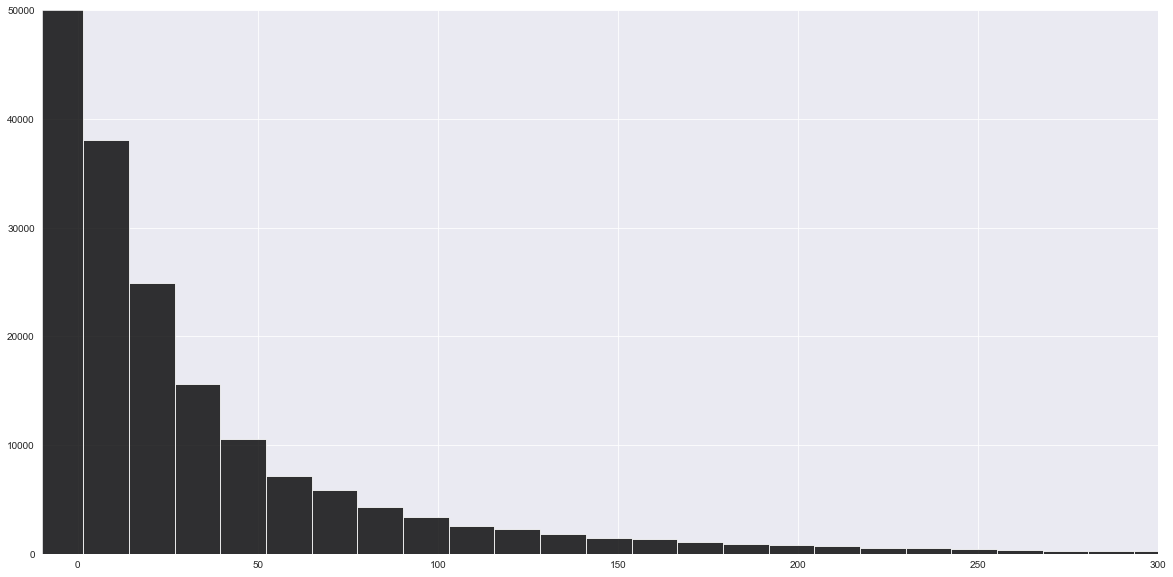

In [63]:
plt.figure(figsize=(20,10))
plt.hist(delays_df['WEATHER_DELAY'], bins=1000, color='k', alpha=0.8)
plt.xlim([-10, 300])
plt.ylim([0, 5e4])
plt.show()

## National Air System Delay

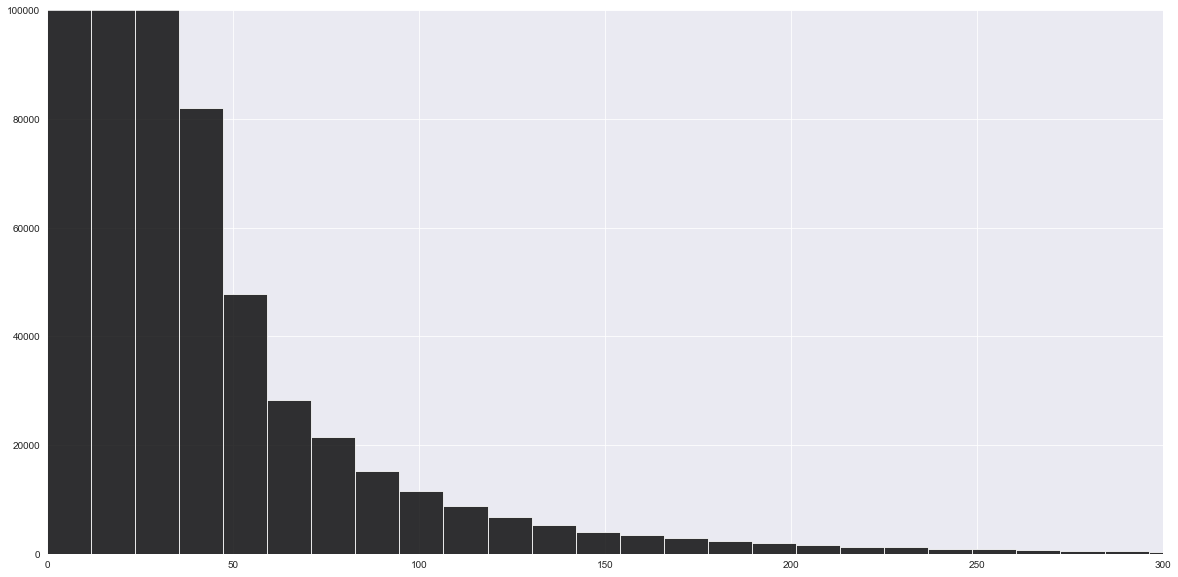

In [64]:
plt.figure(figsize=(20,10))
plt.hist(delays_df['NAS_DELAY'], bins=1000, color='k', alpha=0.8)
plt.xlim([0, 300])
plt.ylim([0, 1e5])
plt.show()

## Security Delay

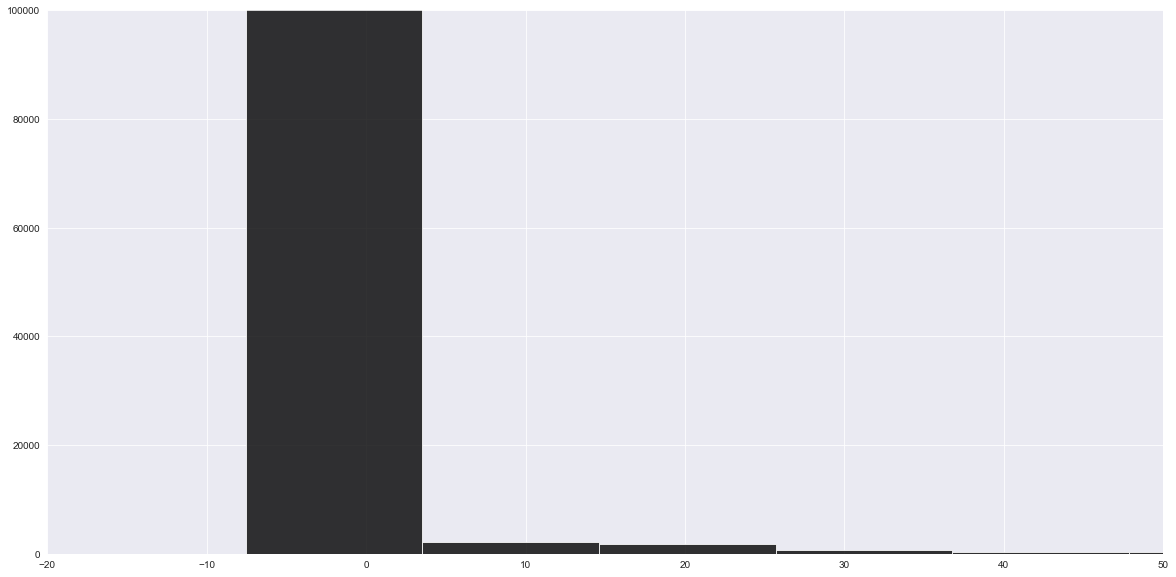

In [70]:
plt.figure(figsize=(20,10))
plt.hist(delays_df['SECURITY_DELAY'], bins=1000, color='k', alpha=0.8)
plt.xlim([-20, 50])
plt.ylim([0, 1e5])
plt.show()

## Late Aircraft Delay

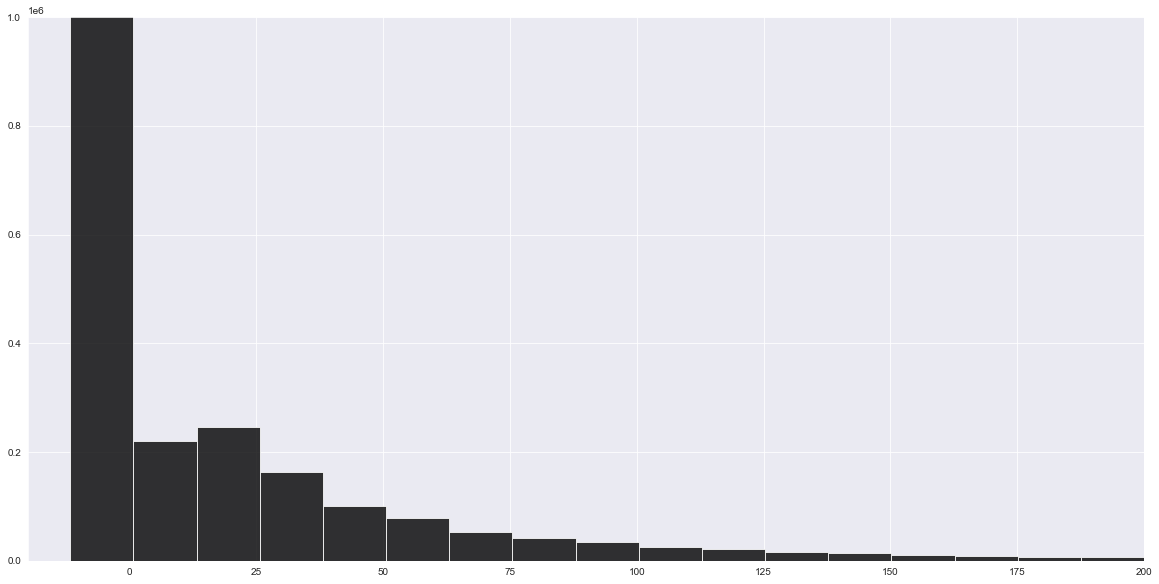

In [75]:
plt.figure(figsize=(20,10))
plt.hist(delays_df['LATE_AIRCRAFT_DELAY'], bins=1000, color='k', alpha=0.8)
plt.xlim([-20, 200])
plt.ylim([0, 1e6])
plt.show()

## Taxi Out time

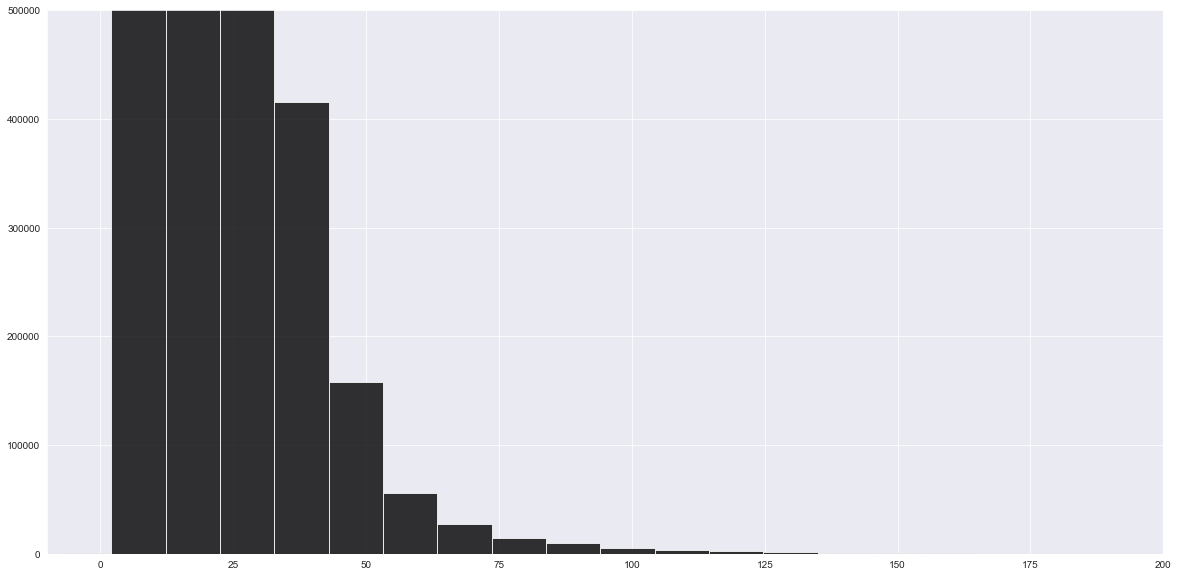

In [81]:
plt.figure(figsize=(20,10))
plt.hist(delays_df['TAXI_OUT'], bins=1000, color='k', alpha=0.8)
plt.xlim([-10, 200])
plt.ylim([0, 5e5])
plt.show()